In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
nycGPD = gpd.read_file('/Users/lantianzhang/CUSP_2023_Spring/MLCities/nyc_rodent/Data/NYC_BGRP/nyc_bgrp.shp')
nycGPD

,spatial_id,name,VALUE0,VALUE1,VALUE2,VALUE3,geometry
0,360050001000,"BG0001000, Bronx County, NY",0.0000,0.0000,NaN,0.0,"POLYGON ((-73.89772 40.79514, -73.89611 40.796..."
1,360050001001,"BG0001001, Bronx County, NY",0.0000,0.0000,NaN,6472.0,"POLYGON ((-73.89266 40.79382, -73.89194 40.796..."
2,360050002000,"BG0002000, Bronx County, NY",0.0000,0.0000,NaN,0.0,"POLYGON ((-73.86648 40.80590, -73.86231 40.809..."
3,360050002001,"BG0002001, Bronx County, NY",48.0435,51.7391,40196.019522,1816.0,"POLYGON ((-73.86333 40.81478, -73.86240 40.814..."
4,360050002002,"BG0002002, Bronx County, NY",30.8962,68.8679,47662.679687,1124.0,"POLYGON ((-73.86522 40.81453, -73.86425 40.814..."
...,...,...,...,...,...,...,...
6488,360850319022,"BG0319022, Richmond County, NY",88.5986,11.1639,105460.252904,1777.0,"POLYGON ((-74.17122 40.63744, -74.16969 40.637..."
6489,360850319023,"BG0319023, Richmond County, NY",68.8663,30.9645,133081.521244,2224.0,"POLYGON ((-74.16619 40.63585, -74.16509 40.635..."
6490,360850323000,"BG0323000, Richmond County, NY",0.0000,0.0000,NaN,0.0,"POLYGON ((-74.19709 40.63574, -74.19706 40.635..."
6491,360850323001,"BG0323001, Richmond County, NY",75.1843,24.5700,71999.732273,1061.0,"POLYGON ((-74.19592 40.63522, -74.19589 40.635..."


<AxesSubplot: >

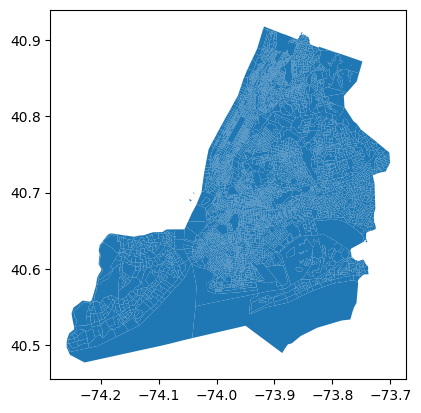

In [4]:
nycGPD.plot()

In [5]:
nycBB = gpd.read_file('/Users/lantianzhang/CUSP_2023_Spring/MLCities/nyc_rodent/Data/NYC_BB/nyc_bb.shp')

In [6]:
nycBB

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1.0,Manhattan,6.365208e+08,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934143e+09,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [7]:
nycGPD.geometry = gpd.clip(nycGPD.geometry, nycBB.geometry) #clip to shoreline

/var/folders/29/p7822gbd5bg0z6s_kqpfnxvr0000gn/T/ipykernel_1056/1989942537.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  nycGPD.geometry = gpd.clip(nycGPD.geometry, nycBB.geometry)


In [10]:
nycGPD.rename(columns={"VALUE0":"%OfOwnerOccupiedHousing","VALUE1":"%OfRenterOccupiedHousing","VALUE2":"MedianHouseholdIncome","VALUE3":"TotalPopulation"},inplace=True)

<AxesSubplot: >

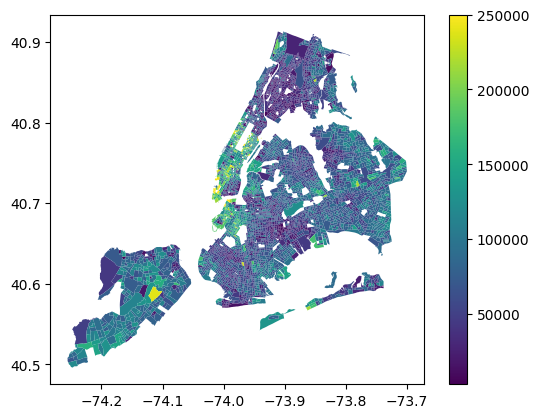

In [11]:
nycGPD.plot(column='MedianHouseholdIncome',legend=True)

In [12]:
nycGPD.to_file('/Users/lantianzhang/CUSP_2023_Spring/MLCities/nyc_rodent/Data/nyc_bgrp.geojson',driver="GeoJSON")